# Supplements - Sale - Project

In [1]:
# Importing all the libraries needed

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# IMPORTING THE DATASET INTO LIBARARY

In [2]:
df = pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")

# DATA PREPROCESING

In [3]:
# CHECKING FIRST FIVE ROWS OF THE DATASET(By default it only shows first five rows)

df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [4]:
# CHECKING Last FIVE ROWS OF THE DATASET(By default it only shows last five rows)

df.tail()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon
4383,2025-03-31,Electrolyte Powder,Hydration,178,39.12,6963.36,0.23,0,UK,iHerb


In [5]:
# CHECKING THE SHAPE OF THE DATASET( ROWS & COLUMNS)

df.shape

(4384, 10)

In [6]:
# CHECKING THE DATYPE OF EACH COLUMN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [7]:
# CHECKING IF DATA CONTAINS ANY NULL VALUES

df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [8]:
# APPYLING DESCIRBE FUNCTION ON ALL NUMERICAL VALUES 

df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


In [9]:
# Loop through each column and apply value_counts, then sort by frequency

for i in df.columns:
    print(f"Value counts for column: {i}")
    print(df[i].value_counts())
    print("\n" + "="*50 + "\n")


Value counts for column: Date
Date
2025-03-31    16
2020-01-06    16
2024-12-09    16
2024-12-02    16
2024-11-25    16
              ..
2020-02-17    16
2020-02-10    16
2020-02-03    16
2020-01-27    16
2020-01-20    16
Name: count, Length: 274, dtype: int64


Value counts for column: Product Name
Product Name
Whey Protein          274
Vitamin C             274
Fish Oil              274
Multivitamin          274
Pre-Workout           274
BCAA                  274
Creatine              274
Zinc                  274
Collagen Peptides     274
Magnesium             274
Ashwagandha           274
Melatonin             274
Biotin                274
Green Tea Extract     274
Iron Supplement       274
Electrolyte Powder    274
Name: count, dtype: int64


Value counts for column: Category
Category
Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: cou

# DATA Visualizations (EDA)

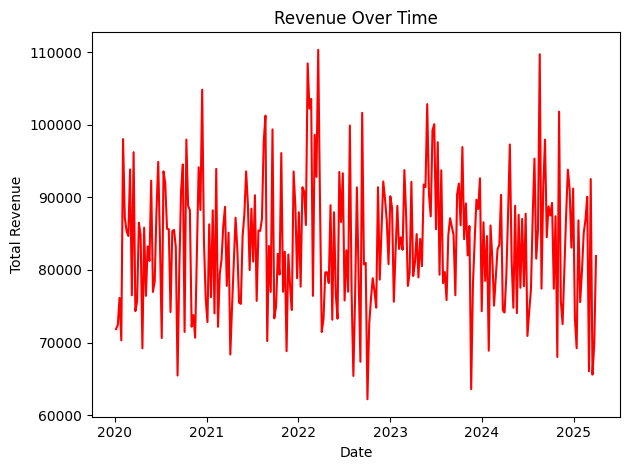

In [10]:
# CONVERTED DATA COLUMN DATYPE TO DATETIME CATEGORY BECAUSE IT BELONGS TO THE CERTIAN CATEGORY

# THE CODE TAKES THE DATA, GROUPS IT BY EACH DATE, SUMS UP THE REVENUE FOR RACH DATE, AND CREATES A NEW DATFRAME(DF_TIME) WITH TOTAL 
# REVENUE FOR EACH DATE


df["Date"] = pd.to_datetime(df["Date"])
df_time = df.groupby("Date")["Revenue"].sum().reset_index()

plt.figure()
sns.lineplot(data = df_time, x = "Date", y = "Revenue",  color = "r")
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()             
             

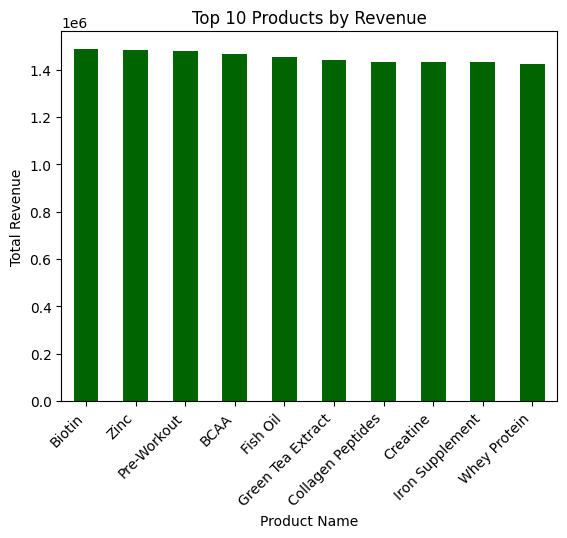

In [11]:
# VISUALIZING THE TOP 10 PRODUCTS SOLD ACCORDING TO REVENUE

top_products = df.groupby("Product Name")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure()
top_products.plot(kind = "bar", color = "darkgreen")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation = 45, ha = "right")
plt.show()

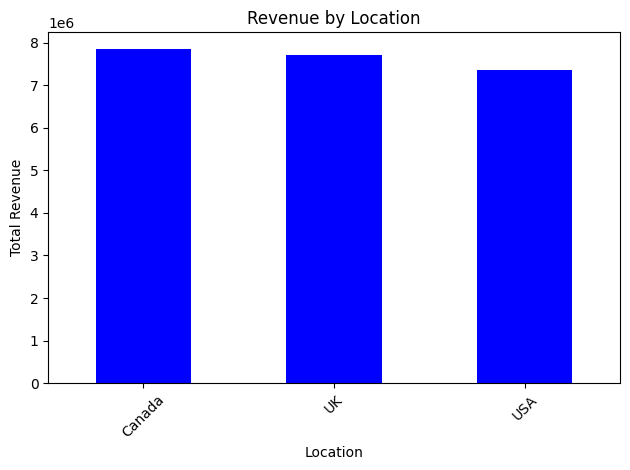

In [12]:
# CHECKING WHICH LOCATION SELLS MOST PRODUCTS BASED ON REVENUE

loc_revenue = df.groupby("Location")["Revenue"].sum().sort_values(ascending = False)
plt.figure()
loc_revenue.plot(kind = "bar", color = "blue")
plt.title("Revenue by Location")
plt.xlabel("Location")
plt.ylabel("Total Revenue")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

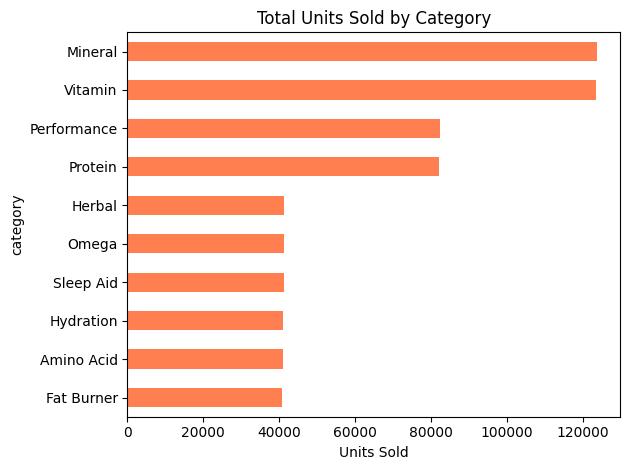

In [13]:
# CHECKING WHICH CATEGORY SOLD MOST OF THE UNITS 

cat_sales = df.groupby("Category")["Units Sold"].sum().sort_values()
plt.figure()
cat_sales.plot(kind = "barh", color = "Coral")
plt.title("Total Units Sold by Category")
plt.xlabel("Units Sold")
plt.ylabel("category")
plt.tight_layout()
plt.show()     

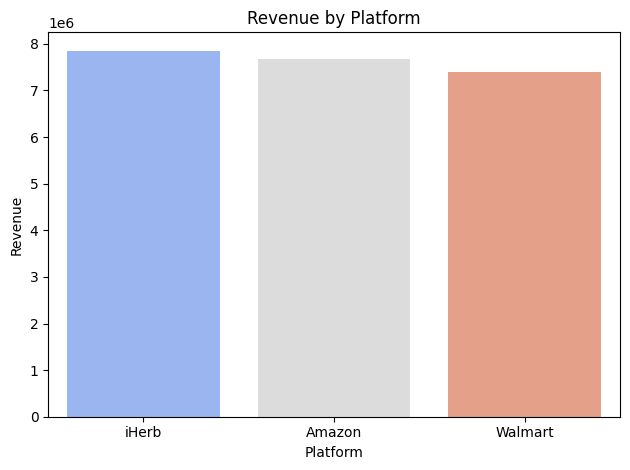

In [14]:
# CHECKING WHICH PLATFORM MADE MOST OF THE MONEY BY SELLING THEIR PRODUCTS 


platform_revenue = df.groupby("Platform")["Revenue"].sum().sort_values(ascending = False)
plt.figure()
sns.barplot(x = platform_revenue.index, y = platform_revenue.values, palette = "coolwarm")
plt.title("Revenue by Platform")
plt.xlabel("Platform")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

<Axes: >

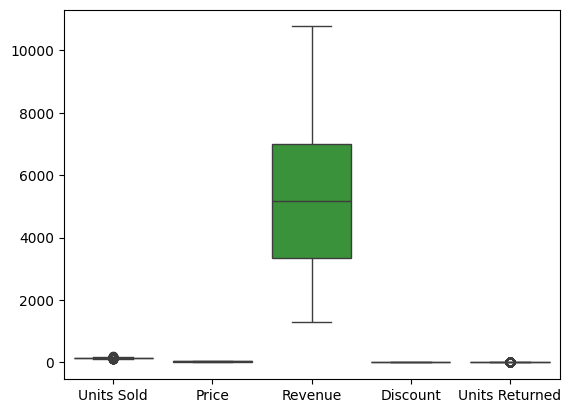

In [15]:
# CHECKING FOR OUTLIERS IN NUMERICAL COLUMNS

sns.boxplot(df)

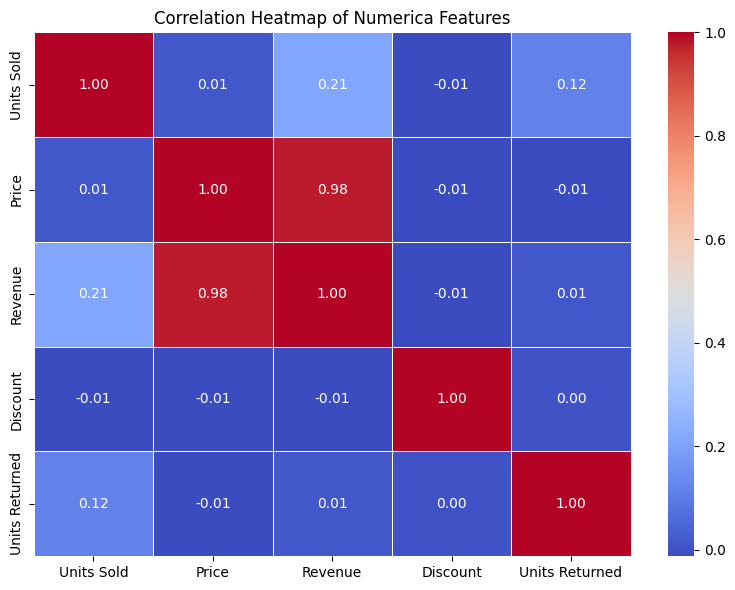

In [16]:
# MAKING A HEATMAP TO SEE CO-REALTION

numeric_df = df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidth = 0.5)
plt.title("Correlation Heatmap of Numerica Features")
plt.tight_layout()
plt.show()

# Top 5 CONCLUSIONS BASED ON VISUALIZATION

In [17]:
# 1.) We can cocnlude that peak year of sales was between 2022 - 2023

# 2.) We can also conclude that the top ten products which made most of the revenue are Biotin, Zinc, Pre-workout, BCCA, Fish Oil, 
#     Green Tea Extract, Collagen Peptides, creatine, Iron Supplement, Whey Protein

# 3.) We can also conclude where most products were sold and they were Canada Uk, Usa

# 4.) Based on our viualization we can see the top four category's sold our [ Vitamin: 822, Mineral: 822, Protein: 548, Performance: 548]

# 5.) we can also conclude that the top 3 platforms that make most money by selling projects are ["iHerb, "Amazon Platform", "Walmart"]

# SUBPLOT OF DATA

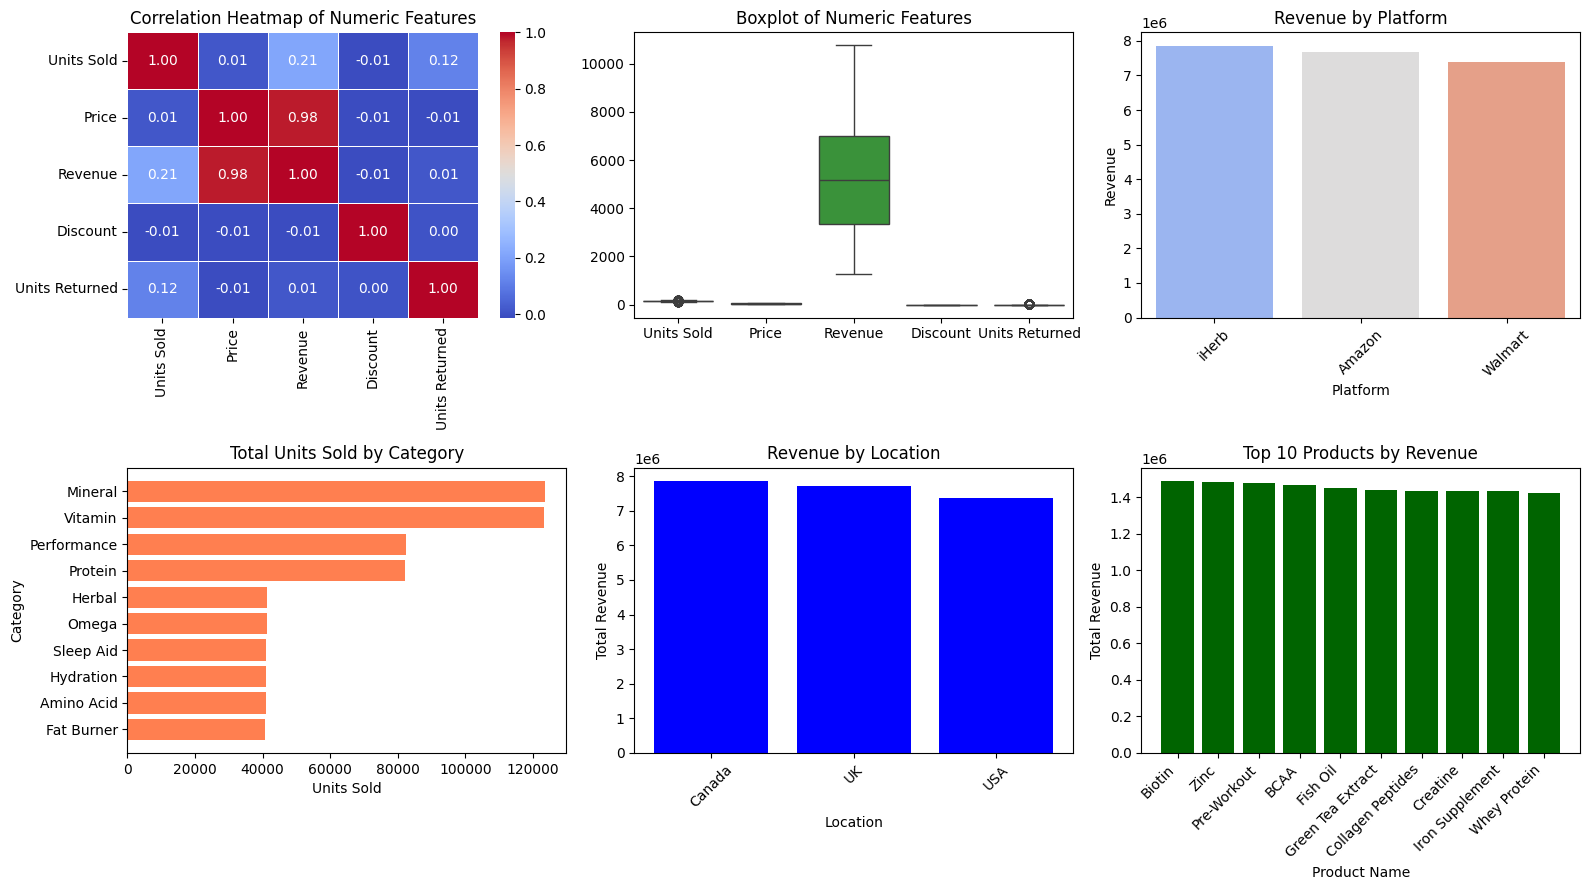

In [18]:
plt.figure(figsize=(16, 9))

# 1. Correlation Heatmap
plt.subplot(2, 3, 1)
numeric_df = df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap of Numeric Features")

# 2. Boxplot of numeric features
plt.subplot(2, 3, 2)
sns.boxplot(data=numeric_df)
plt.title("Boxplot of Numeric Features")

# 3. Revenue by Platform
plt.subplot(2, 3, 3)
platform_revenue = df.groupby("Platform")["Revenue"].sum().sort_values(ascending=False)
sns.barplot(x=platform_revenue.index, y=platform_revenue.values, palette="coolwarm")
plt.title("Revenue by Platform")
plt.xlabel("Platform")
plt.ylabel("Revenue")
plt.xticks(rotation=45)

# 4. Units Sold by Category
plt.subplot(2, 3, 4)
cat_sales = df.groupby("Category")["Units Sold"].sum().sort_values()
plt.barh(cat_sales.index, cat_sales.values, color="coral")
plt.title("Total Units Sold by Category")
plt.xlabel("Units Sold")
plt.ylabel("Category")

# 5. Revenue by Location
plt.subplot(2, 3, 5)
loc_revenue = df.groupby("Location")["Revenue"].sum().sort_values(ascending=False)
plt.bar(loc_revenue.index, loc_revenue.values, color="blue")
plt.title("Revenue by Location")
plt.xlabel("Location")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

# 6. Top 10 Products by Revenue
plt.subplot(2, 3, 6)
top_products = df.groupby("Product Name")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.bar(top_products.index, top_products.values, color="darkgreen")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")

# Final layout and show
plt.tight_layout()
plt.savefig('supplyment_Sales',dpi = 1000)
plt.show()


# ENCODING

In [19]:
# Label Encoding

le = LabelEncoder()
for i in ["Category", "Location", "Platform"]:
    df[i] = le.fit_transform(df[i])

df.drop(["Date", "Product Name", "Month", "Year"], axis = 1, inplace = True, errors = "ignore")


# TRAIN TEST SPLIT

In [20]:
X = df.drop(columns = "Revenue")
y = df["Revenue"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 33)

In [22]:
# Scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling 

In [23]:
# Models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor()
}

# Results
res = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_preds = model.predict(X_test_scaled)
    score = r2_score(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    
    print(f"\nPerformance: {name}")
    print(f"R² Score: {score:.4f}")
    print(f"Accuracy: {score * 100:.2f}%")
    print(f"MSE: {mse:.2f}")
    
    res.append({
        'Model': name,
        'R² Score': round(score, 4),
        'Accuracy (%)': round(score * 100, 2),
        'MSE': round(mse, 2)
    })

# Summary DataFrame
result_df = pd.DataFrame(res)
print("\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Models Performance Summary: <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print(result_df)


Performance: LinearRegression
R² Score: 0.9939
Accuracy: 99.39%
MSE: 26604.02

Performance: Ridge
R² Score: 0.9939
Accuracy: 99.39%
MSE: 26578.49

Performance: RandomForest
R² Score: 0.9996
Accuracy: 99.96%
MSE: 1917.53

Performance: AdaBoost
R² Score: 0.9845
Accuracy: 98.45%
MSE: 67942.12

Performance: Bagging
R² Score: 0.9994
Accuracy: 99.94%
MSE: 2733.39

Performance: GradientBoosting
R² Score: 0.9994
Accuracy: 99.94%
MSE: 2641.58

Performance: DecisionTree
R² Score: 0.9982
Accuracy: 99.82%
MSE: 7694.46

Performance: KNN
R² Score: 0.9379
Accuracy: 93.79%
MSE: 271449.91

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Models Performance Summary: <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
              Model  R² Score  Accuracy (%)        MSE
0  LinearRegression    0.9939         99.39   26604.02
1             Ridge    0.9939         99.39   26578.49
2      RandomForest    0.9996         99.96    1917.53
3          AdaBoost    0.9845         98.45   67942.12
4           Bagging    0.9994         99.94    27

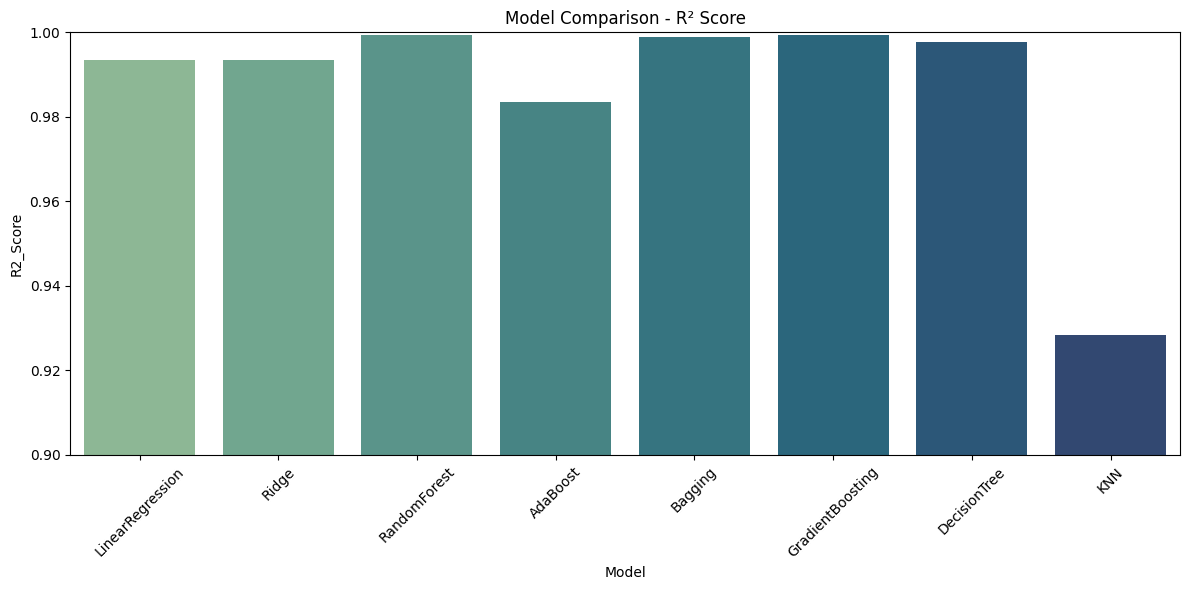

In [35]:
# Model Performance Summary Data


summary = pd.DataFrame({
    "Model": ["LinearRegression", "Ridge", "RandomForest", "AdaBoost", "Bagging", "GradientBoosting", "DecisionTree", "KNN"],
    'R2_Score': [0.9934, 0.9934, 0.9993, 0.9834, 0.9990, 0.9993, 0.9978, 0.9284],
    'Accuracy (%)': [99.34, 99.34, 99.93, 98.34, 99.90, 99.93, 99.78, 92.84],
    'MSE': [30453.59, 30445.83, 3384.06, 76710.96, 4810.39, 3045.86, 10140.61, 331562.42]
})

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R2_Score", data=summary, palette="crest")
plt.title('Model Comparison - R² Score')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()
